# Data Sampling and Collection

The datasets we choose is from the [Amazon Review Data](https://nijianmo.github.io/amazon/index.html) of Topic 3 - Dataset B: recommender systems. 

## How were the data collected?
According to the [official website](https://nijianmo.github.io/amazon/index.html) of this collection of datasets, the data are collected from Amazon shopping site. It contains reviews (ratings, text, helpfulness votes), product metadata (descriptions, category information, price, brand, and image features), and links (also viewed/also bought graphs). Current data includes reviews in the range May 1996 - Oct 2018. 

## Was there any potential bias introduced in the sampling process?
During the sampling process, there might be potential bias introduced. First, they collected data from certain categories and only included data from certain time frame, so there could be selection bias.

For this case study, we only analyze the `metadata` dataset and `ratings only` dataset from the Prime Pantry category. The metadata contains the product information of 10,815 products in total. The ratings only dataset contains 471,614 ratings in total.

# Data Cleaning

Here we import all the python libraries we need for this project.

In [71]:
import numpy as np
import gzip
import pandas as pd
from pandas.api.types import CategoricalDtype
import json
import re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

First, we need to read in the whole metadata dataset that is in the json format to examine the original data. Code in the next cell is modified based on example functions provided on the [official website](https://nijianmo.github.io/amazon/index.html).

In [72]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df_meta = getDF('meta_Prime_Pantry.json.gz')
df_meta.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,[],,[Sink your sweet tooth into MILK DUDS Candya d...,,"HERSHEY'S Milk Duds Candy, 5 Ounce(Halloween C...","[B019KE37WO, B007NQSWEU]",,Milk Duds,[],[],[],"{'ASIN: ': 'B00005BPJO', 'Item model number:':...","<img src=""https://m.media-amazon.com/images/G/...",,,$5.00,B00005BPJO,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,[],,[Sink your sweet tooth into MILK DUDS Candya d...,,"HERSHEY'S Milk Duds Candy, 5 Ounce(Halloween C...","[B019KE37WO, B007NQSWEU]",,Milk Duds,[],[],[],"{'ASIN: ': 'B00005BPJO', 'Item model number:':...","<img src=""https://m.media-amazon.com/images/G/...",,,$5.00,B00005BPJO,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,[],,[A perfect Lentil soup starts with Goya Lentil...,,"Goya Dry Lentils, 16 oz","[B003SI144W, B000VDRKEK]",,Goya,[],[],"[B074MFVZG7, B079PTH69L, B000VDRKEK, B074M9T81...",{'ASIN: ': 'B0000DIF38'},"<img src=""https://images-na.ssl-images-amazon....",,,,B0000DIF38,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,[],,[Saran Premium Wrap is an extra tough yet easy...,,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",,Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",{'Domestic Shipping: ': 'This item can only be...,"<img src=""https://images-na.ssl-images-amazon....",,,,B0000DIWNI,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,[],,[200 sq ft (285 ft x 11-3/4 in x 18.6 m2). Eas...,,"Saran Cling Plus Plastic Wrap, 200 Sq Ft",[],,Saran,[],[],[B0014CZ0TE],{'Domestic Shipping: ': 'This item can only be...,"<img src=""https://images-na.ssl-images-amazon....",,,,B0000DIWNZ,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


Secondly, we also need to read the ratings only dataset in the csv format into this notebook. Since this dataset doesn't contain the header row, we need to add that manually.

In [73]:
df_rating = pd.read_csv('Prime_Pantry.csv', names=["item", "user", "rating", "timestamp"])
df_rating.head()


,item,user,rating,timestamp
0,B0000DIWNZ,A1NKJW0TNRVS7O,5.0,1418515200
1,B0000DIWNZ,A2L6X37E8TFTCC,4.0,1416441600
2,B0000DIWNZ,A2WPR4W6V48121,4.0,1412985600
3,B0000DIWNZ,A27EE7X7L29UMU,3.0,1409529600
4,B0000DIWNZ,A1OWT4YZGB5GV9,4.0,1407628800


## What type of data are you currently exploring?
The data we are exploring in this pantry dataset is the product information and ratings from Amazon Prime Pantry category. The metadata includes descriptions, title, price, sales-rank, brand info, co-purchasing links, etc. The rating dataset includes rating information like the item, user, rating and timestamp.


## What is the granularity of the data?
The granularity of the metadata dataset is the detailed product profile for each product in the Amazon Prime Pantry category. 

Here is the description of metadata dataset from the official website:
*   asin - ID of the product, e.g. 0000031852
*   title - name of the product
*   feature - bullet-point format features of the product
*   description - description of the product
*   price - price in US dollars (at time of crawl)
*   imageURL - url of the product image
*   imageURL - url of the high resolution product image
*   related - related products (also bought, also viewed, bought together, buy after viewing)
*   salesRank - sales rank information
*   brand - brand name
*   categories - list of categories the product belongs to
*   tech1 - the first technical detail table of the product
*   tech2 - the second technical detail table of the product
*   similar - similar product table

The granularity of the rating dataset is the detailed rating informastion for each review of products in the Amazon Prime Pantry category.

The rating dataset include no metadata or reviews, but only (item,user,rating,timestamp) tuples.


## What does the distribution of the data look like? Are there any outliers? Are there any missing or invalid entries?



In [74]:
print('The shape of the metadata dataframe is:')
print(df_meta.shape)
print('The shape of the rating dataframe is:')
print(df_rating.shape)

The shape of the metadata dataframe is:
(10813, 19)
The shape of the rating dataframe is:
(471614, 4)


Overall, there are 10813 entries of product profile (which is inconsistant with the description on the official website) in the metadata, and every entry has 19 features. There are 471614 entries of ratings in the rating dataset, and every entry has 4 features.

From the original metadata dataframe, we can see that there are a lot of coloumns for each data entry, some of the cells are either empty or too complicated to read. Thus, we need to further examine and clean the data for the next step - Exploratory Data Analysis.

First, from the description we know that the column of "*asin*" is the ID of the product, which should be the prime key for this dataset. Therefore, we can remove all the duplicates based on this value - it seems there is only 1 duplicate record.

In [75]:
df_nodup = df_meta.drop_duplicates(subset=['asin'])
print(df_meta.shape)

(10813, 19)


### Dealing with missing/empty entries

Then, we can check for null/missing values. The result shows that there aren't any null values in either dataframes, but from the glimpse of the metadata dataframe, we can see a lot of empty cells. So we need to perform further data cleaning on the metadata dataframe by examining every column one by one.


In [76]:
print('Metadata dataframe:')
print(df_nodup.isnull().sum())
print()
print('Rating dataframe:')
print(df_rating.isnull().sum())

Metadata dataframe:
category           0
tech1              0
description        0
fit                0
title              0
also_buy           0
tech2              0
brand              0
feature            0
rank               0
also_view          0
details            0
main_cat           0
similar_item       0
date               0
price              0
asin               0
imageURL           0
imageURLHighRes    0
dtype: int64

Rating dataframe:
item         0
user         0
rating       0
timestamp    0
dtype: int64


In [77]:
print("Numbers of rows that have a valid category value:")
print(len(df_nodup[df_nodup["category"].str.len() != 0]))
print("Numbers of rows that have a non-empty tech1 value:")
print(len(df_nodup[df_nodup["tech1"].str.len() != 0]))
print("Numbers of rows that have a non-empty tech2 value:")
print(len(df_nodup[df_nodup["tech2"].str.len() != 0]))
print("Numbers of rows that have a non-empty fit value:")
print(len(df_nodup[df_nodup["fit"].str.len() != 0]))
print("Numbers of rows that have a non-empty similar_item value:")
print(len(df_nodup[df_nodup["similar_item"].str.len() != 0]))
print("Numbers of rows that have a non-empty date value:")
print(len(df_nodup[df_nodup["date"].str.len() != 0]))

Numbers of rows that have a valid category value:
0
Numbers of rows that have a non-empty tech1 value:
0
Numbers of rows that have a non-empty tech2 value:
0
Numbers of rows that have a non-empty fit value:
0
Numbers of rows that have a non-empty similar_item value:
0
Numbers of rows that have a non-empty date value:
0


In [78]:
print("Numbers of rows that have a non-empty feature value:")
print(len(df_nodup[df_nodup["feature"].str.len() != 0]))
print("Numbers of rows that have a non-empty price value:")
print(len(df_nodup[df_nodup["price"].str.len() != 0]))
print("Numbers of rows that have a non-empty imageURL value:")
print(len(df_nodup[df_nodup["imageURL"].str.len() != 0]))
print("Numbers of rows that have a non-empty imageURLHighRes value:")
print(len(df_nodup[df_nodup["imageURLHighRes"].str.len() != 0]))

Numbers of rows that have a non-empty feature value:
1036
Numbers of rows that have a non-empty price value:
6749
Numbers of rows that have a non-empty imageURL value:
9031
Numbers of rows that have a non-empty imageURLHighRes value:
9031


After examination, we found that there are six columns of feature that are all empty, which we can exclude when doing EDA and data modeling.

In [79]:
df_noempty = df_nodup.copy()
df_noempty = df_noempty.drop(['category', 'tech1', 'tech2', 'fit', 'similar_item', 'date'], axis = 1)
df_noempty.shape

(10812, 13)

### Dealing with unreadable and complex entries

Upon inspection, we found that some of value in the '*feature*' column are in the complicated format of `<span class="a-size-base a-color-secondary">\n real feature\n </span> `, thus, we create a feature extraction function to reformat the value into clean and readable feature lists, and put them in the new '*feature_clean*' column.

In [80]:
df_noempty["feature"].loc[22]

['<span class="a-size-base a-color-secondary">\n                100% whole grain oats\n            </span>',
 '<span class="a-size-base a-color-secondary">\n                Provides energy to help get you going\n            </span>',
 '<span class="a-size-base a-color-secondary">\n                Good source of fiber\n            </span>',
 '<span class="a-size-base a-color-secondary">\n                A healthy addition to many recipes\n            </span>',
 '<span class="a-size-base a-color-secondary">\n                Soluble fiber helps lower cholesterol to support heart health**\n            </span>',
 '<span class="a-size-base a-color-secondary">\n                **Consuming 3 grams of soluble fiber daily from oatmeal, in a diet low in saturated fat and cholesterol, may reduce the risk of heart disease.\n            </span>']

In [81]:
# A function that extract feature from original feature column and make it readable
# input: original feature column value
# output: new readable feature column value
def extract_feature(feature_list):
  res = []
  if len(feature_list)==0:
    return res
  pattern = '<.*>'
  for feature in feature_list:
    extracted = re.sub(pattern, '', feature)
    extracted = extracted.replace('\n', '')
    res.append(extracted.strip())
  return res


df_noempty["feature_clean"] = df_noempty["feature"].apply(lambda x: extract_feature(x))

<hr style="border: 2px solid #fdb515;" />

For the '*rank*' column, we can see that there are empty cells as well as cells with value. For record with a rank message, the message is in the form of `rank number + " in " + rank category`, so we create two functions to seperatly extract these two values from the original '*rank*' column and put them into *rank_num* and *rank_cat* columns.

In [82]:
sum([len(x)>0 for x in df_noempty["feature_clean"]]) / len(df_noempty)

0.09581945985941547

In [83]:
# Two functions that extract rank number and category from original rank column
# input: original rank column value
# output: rank number and rank column
def extract_rank_num(rank_value):
  if len(rank_value)==0:
    return 0
  num= rank_value.split(' in ')[0]
  num = num.replace(',', '')
  return int(num)

def extract_rank_cat(rank_value):
  if len(rank_value)==0:
    return ''
  cat = rank_value.split(' in ')[1]
  cat = cat.replace(' (', '')
  cat = cat.replace('&amp;', '&')
  return cat


df_noempty["rank_num"] = df_noempty["rank"].apply(lambda x: extract_rank_num(x))
df_noempty["rank_cat"] = df_noempty["rank"].apply(lambda x: extract_rank_cat(x))

<hr style="border: 2px solid #fdb515;" />

For the '*price*' column, we can see that there are empty cells as well as cells with string value. We created a function to cast the string of price to float for future analysis and put them in the new '*price_num*' column. 

In [84]:
# A function that extract the price value from original price column
# input: original price column value
# output: price value in float number
def extract_price(price):
  if (len(price)==0) | ('$' not in price):
    return np.NaN
  price = price[1:]
  return float(price)


df_noempty["price_num"] = df_noempty["price"].apply(lambda x: extract_price(x))

In [85]:
sum(df_noempty["price_num"].isna())/len(df_noempty)

0.3800406955234924

In [86]:
df_noempty['price_num'] = df_noempty['price_num'].fillna(df_noempty['price_num'].mean())

<hr style="border: 2px solid #fdb515;" />

At the end of data cleaning, we have a metadata dataframe that has 10812 entries with 17 columns of feature.

In [87]:
print(df_noempty.shape)
df_noempty.head()

(10812, 17)


,description,title,also_buy,brand,feature,rank,also_view,details,main_cat,price,asin,imageURL,imageURLHighRes,feature_clean,rank_num,rank_cat,price_num
0,[Sink your sweet tooth into MILK DUDS Candya d...,"HERSHEY'S Milk Duds Candy, 5 Ounce(Halloween C...","[B019KE37WO, B007NQSWEU]",Milk Duds,[],[],[],"{'ASIN: ': 'B00005BPJO', 'Item model number:':...","<img src=""https://m.media-amazon.com/images/G/...",$5.00,B00005BPJO,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,[],0,,5.000000
2,[A perfect Lentil soup starts with Goya Lentil...,"Goya Dry Lentils, 16 oz","[B003SI144W, B000VDRKEK]",Goya,[],[],"[B074MFVZG7, B079PTH69L, B000VDRKEK, B074M9T81...",{'ASIN: ': 'B0000DIF38'},"<img src=""https://images-na.ssl-images-amazon....",,B0000DIF38,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,[],0,,7.421893
3,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",{'Domestic Shipping: ': 'This item can only be...,"<img src=""https://images-na.ssl-images-amazon....",,B0000DIWNI,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,[],0,,7.421893
4,[200 sq ft (285 ft x 11-3/4 in x 18.6 m2). Eas...,"Saran Cling Plus Plastic Wrap, 200 Sq Ft",[],Saran,[],[],[B0014CZ0TE],{'Domestic Shipping: ': 'This item can only be...,"<img src=""https://images-na.ssl-images-amazon....",,B0000DIWNZ,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,[],0,,7.421893
5,"[Ibarra Chocolate, 19 Oz, , ]","Ibarra Mexican Chocolate, 19 oz",[B008MHKWLK],Ibarra,[],"259,768 in Grocery &amp; Gourmet Food (",[],"{'ASIN: ': 'B0000GH6UG', 'Item model number:':...","<img src=""https://images-na.ssl-images-amazon....",,B0000GH6UG,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,[],259768,Grocery & Gourmet Food,7.421893


# Exploratory Data Analysis

## Explore by product and rating

For this part, we first start by exploring the rating datatset. Since every entry in this dataset is one rating review, we can group the dataframe by `item` and compute the average rating and how many rating it has for each product.

In [88]:
df_rating_avg = df_rating[['item','rating', 'timestamp']].groupby('item').agg({'rating':'mean', 'timestamp':'count'})
df_rating_avg = df_rating_avg.rename(columns={"timestamp": "rating_cnt"}).sort_values(by=['rating','rating_cnt'], ascending=False)
df_rating_avg.head(10)

,rating,rating_cnt
item,,
B000VK5VJO,5.0,44
B016M2TC0S,5.0,26
B010NBK8HA,5.0,23
B00X7ZXX8Q,5.0,20
B016XR4BHG,5.0,20
B00Q8SWMIQ,5.0,18
B00J51RPVC,5.0,16
B00QKIHSVU,5.0,16
B01COSMQZC,5.0,16


In [89]:
df_rating_avg = df_rating_avg[df_rating_avg['rating_cnt']>5] # leave only products that have more than 5 ratings

Now, we can join this table with the metadata to provide rating information for each product. Both the `asin` column in the metadata dataframe and the `item` column in the rating dataframe refers to the product id, so we can merge the two dataframe based on this value. After the merge, we can verify again that every product in the metadata has a valid rating value and rating counts.


In [90]:
df_clean = df_noempty.copy()
df_clean = df_clean.merge(df_rating_avg, how = 'inner', left_on='asin', right_on='item')
print(df_clean.isnull().sum())
df_clean.head()

description        0
title              0
also_buy           0
brand              0
feature            0
rank               0
also_view          0
details            0
main_cat           0
price              0
asin               0
imageURL           0
imageURLHighRes    0
feature_clean      0
rank_num           0
rank_cat           0
price_num          0
rating             0
rating_cnt         0
dtype: int64


,description,title,also_buy,brand,feature,rank,also_view,details,main_cat,price,asin,imageURL,imageURLHighRes,feature_clean,rank_num,rank_cat,price_num,rating,rating_cnt
0,[Sink your sweet tooth into MILK DUDS Candya d...,"HERSHEY'S Milk Duds Candy, 5 Ounce(Halloween C...","[B019KE37WO, B007NQSWEU]",Milk Duds,[],[],[],"{'ASIN: ': 'B00005BPJO', 'Item model number:':...","<img src=""https://m.media-amazon.com/images/G/...",$5.00,B00005BPJO,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,[],0,,5.000000,3.300000,10
1,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",{'Domestic Shipping: ': 'This item can only be...,"<img src=""https://images-na.ssl-images-amazon....",,B0000DIWNI,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,[],0,,7.421893,4.062500,64
2,[200 sq ft (285 ft x 11-3/4 in x 18.6 m2). Eas...,"Saran Cling Plus Plastic Wrap, 200 Sq Ft",[],Saran,[],[],[B0014CZ0TE],{'Domestic Shipping: ': 'This item can only be...,"<img src=""https://images-na.ssl-images-amazon....",,B0000DIWNZ,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,[],0,,7.421893,4.000000,20
3,"[Ibarra Chocolate, 19 Oz, , ]","Ibarra Mexican Chocolate, 19 oz",[B008MHKWLK],Ibarra,[],"259,768 in Grocery &amp; Gourmet Food (",[],"{'ASIN: ': 'B0000GH6UG', 'Item model number:':...","<img src=""https://images-na.ssl-images-amazon....",,B0000GH6UG,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,[],259768,Grocery & Gourmet Food,7.421893,3.959184,49
4,[Knorr Granulated Chicken Flavor Bouillon is a...,"Knorr Granulated Bouillon, Chicken 15.9 oz",[],Knorr,[],"372,929 in Grocery & Gourmet Food (",[],"{'ASIN: ': 'B0000KC2BK', 'Item model number:':...","<img src=""https://images-na.ssl-images-amazon....",$3.09,B0000KC2BK,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,[],372929,Grocery & Gourmet Food,3.090000,5.000000,7


In [91]:
len(df_clean)

7817

Using the joined dataframe, we can explore what are som products that have highest rating number and most rating counts by sort the dataframe by `rating` and `rating_cnt`. If we sort by `rating` first, we can see that the top 10 products with highest rating all have a rating of 5.0, but the number of ratings is not high(below 50). However, if we sort by `rating_cnt` first, we can see that the top 10 products that has most ratings have a rating value in th range of 3.9-4.6, which is consistant with the real world experience.

In [92]:
rating_table = df_clean[['title', 'rating', 'rating_cnt']].sort_values(by=['rating','rating_cnt'], ascending=False)
rating_table.head(10)

,title,rating,rating_cnt
284,"Bob's Red Mill Organic Unbleached White Flour,...",5.0,44
5894,M&amp;M'S Christmas Peanut Chocolate Candy Par...,5.0,26
4109,"HERSHEY'S KISSES Chocolate Candy, 40 Ounce Bul...",5.0,23
3440,"Barilla Pasta, Thick Spaghetti, 16 Ounce",5.0,20
5945,"Plum Organics Mashups, Organic Kids Applesauce...",5.0,20
1811,M&amp;M'S Milk Chocolate MINIS Size Candy 1.08...,5.0,18
910,"Welch's Fruit Snacks, Mixed, 66 Count",5.0,16
1863,"OxiClean Laundry Stain Remover Refill, 64 Oz",5.0,16
7002,"Celestial Seasonings Tea, Bengal Spice, 60 Count",5.0,16
4142,"Lindt Chocolate Lindor Truffles, Caramel Milk ...",5.0,15


In [93]:
rating_cnt_table = df_clean[['title', 'rating', 'rating_cnt']].sort_values(by=['rating_cnt', 'rating'], ascending=False)
rating_cnt_table.head(10)

,title,rating,rating_cnt
581,Crest 3D White Luxe Whitestrips Professional E...,4.160165,6537
3488,Twinings of London Pure Peppermint Herbal Tea ...,4.459861,6191
3179,Brooklyn Bean Roastery Bold Variety Pack Singl...,4.038080,5541
425,"Planters Nutrition Cashews, Almonds, Macadania...",4.162693,4278
398,"Mauna Loa Dry Roasted Macadamias, 6 Oz",4.543640,2956
548,Tide Original Scent HE Turbo Clean Liquid Laun...,4.409929,2115
728,"Pure Protein 23 Grams, Vanilla Creme (4 Count,...",3.918129,2052
661,"Viva Choose-A-Size Big Roll Paper Towels, 3 Count",4.148892,1941
326,"Arm &amp; Hammer Baking Soda, 64 Oz",4.529897,1940
644,Tom's of Maine Fluoride-Free Antiplaque and wh...,4.324134,1703


## Explore by brand & category
Here we explore the distribution of data by brand and category. 

Below is the top 20 brands that have most products listed on Amazon Prime pantry. From the resluts, we can tell that some major brands are those producing food like Quaker and those producing common products like L'Oreal Paris.

In [94]:
df_brand = df_clean[['brand','title']].groupby('brand').count()
df_brand = df_brand.rename(columns={"title": "count"})
df_brand = df_brand.sort_values(by='count', ascending=False)
df_brand.head(20)

,count
brand,
L'Oreal Paris,127
Quaker,120
Garnier,89
Neutrogena,80
Nature Made,70
Barilla,70
Wellness Natural Pet Food,70
McCormick,64
Method,53


Since we do have a category feature that is previously extracted from the rank column, we can seperate the products based on which ranking category it is in. It's obvious that among the products that has a ranking category, the majority of the products are grocery & gourmet food, and a small subset of them are from the Amazon Launchpad category.

In [95]:
df_clean[['brand', 'rank_cat']].groupby('rank_cat').count()

,brand
rank_cat,
,4062
Amazon Launchpad,43
Grocery & Gourmet Food,3712


Thus, to find out the top brands who has the most products listed in the **Grocery & Gourmet Food** category, we can wrangle the data by filtering out any products that doesn't have a rank category listed as "Grocery & Gourmet Food", and then group by th brand again to see the top 10 brands.

One interesting finding is that, comparing the two count table, we can see the count number can be different for the same brand. And that's because there are some products that produced by the same brand but they do not have the ranking information in the original dataset.

In [96]:
df_brand_food = df_clean.loc[df_clean['rank_cat']=='Grocery & Gourmet Food', ['brand', 'title']].groupby('brand').count()
df_brand_food = df_brand_food.rename(columns={"title": "count"}).sort_values(by='count', ascending=False).head(10)
df_brand_food.head(20)

,count
brand,
Quaker,108
Barilla,69
McCormick,63
Campbell's,49
Planters,46
Twinings,38
Betty Crocker,34
Traditional Medicinals,34
Jell-O,33


Using similar method, we can explore the top brands in the Amazon Launchpad category or not have a category listed. 

In [97]:
df_brand_nocat = df_clean.loc[df_clean['rank_cat']=='', ['brand', 'title']].groupby('brand').count()
df_brand_nocat = df_brand_nocat.rename(columns={"title": "count"}).sort_values(by='count', ascending=False).head(10)
df_brand_nocat.head(20)

,count
brand,
L'Oreal Paris,127
Garnier,89
Neutrogena,80
Nature Made,70
Wellness Natural Pet Food,70
Method,53
Aveeno,46
COVERGIRL,41
Olay,41


From the table above, we ca see that most of the top brands that don't have a ranking category are those produce common products like shampoo, cosmetics, supplements, etc.

In [98]:
df_brand_launch = df_clean.loc[df_clean['rank_cat']=='Amazon Launchpad', ['brand', 'title']].groupby('brand').count()
df_brand_launch = df_brand_launch.rename(columns={"title": "count"}).sort_values(by='count', ascending=False).head(10)
df_brand_launch.head(20)

,count
brand,
Vega,11
purely elizabeth,7
Health Warrior,6
Quest Nutrition,5
RoC,4
SmartyPants Gummy Vitamins,3
Back to the Roots,2
Vermont Smoke and Cure,2
Babyganics,1


Upon further research, we found out that Amazon Launchpad is a supplemental program designed to jumpstart and accelerate small business. Their program is designed with startups in mind and to help drive brand awareness. Thus, it makes sense that even the top brands in thi category don't have a lot of products for sale.

## Explore by brand & price
Another interesting correlation we can explore is the relationship between brand and price.

First, we will filter out those products that don't have the price value, and then group them by brand to get average product price. 

From the first table below, we can see the top 10 brands that has the highest product price, which mostly sell coffee and supplement, consistant with real life experience. The second table contains the 10 brands that has the lowest product price, mostly brands of condiments and spices which also makes sense.

In [99]:
df_price = df_clean.loc[df_clean['price_num']>0,['brand','price_num']].groupby('brand').agg('mean')
df_price = df_price.rename(columns={"price_num": "average price"})
df_price = df_price.sort_values(by='average price', ascending=False)
df_price.head(10)

,average price
brand,
alli,62.990000
Panasonic,53.436667
Isopure,39.890000
BSN INC.,38.920000
Enfamil Enspire,38.760000
Caza Trail,37.660000
Blue Emu,33.500000
Enfamil Newborn,33.485000
Good Seasons,33.360000


In [100]:
df_price.tail(10)

,average price
brand,
Kraft Sauce,1.285000
Swan,1.220000
ReaLemon,1.210000
Glico,1.170000
S&W,1.100000
Idahoan,1.036667
Elmer's,0.990000
Pasta Roni,0.980000
Bazic,0.960000


In [101]:
df_clean.loc[df_clean['price_num']>0,['brand','price_num']].groupby('brand').agg('max').rename(columns={"price_num": "average price"}).sort_values(by='average price', ascending=False)

,average price
brand,
Garden of Life,112.99
Panasonic,106.35
Optimum Nutrition,97.42
alli,62.99
Waterpik,59.99
...,...
S&W,1.10
Elmer's,0.99
Pasta Roni,0.98


Then, we can also explore more on the price column itself. We can try to creat a box plot to get a good indication of how the prices are spread out.

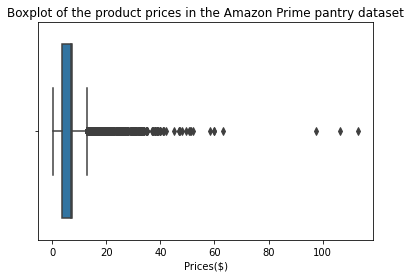

In [102]:
prices = df_clean.loc[df_clean['price_num']>0,'price_num']
ax = sns.boxplot(prices)
ax.set(xlabel='Prices($)', title='Boxplot of the product prices in the Amazon Prime pantry dataset')
plt.show()

We can see from the boxplot that there are some outliers in the price range of (20,250). To get a better visualization of how the prices are distributed, we can temporarily cast out those outliers and plot it again.

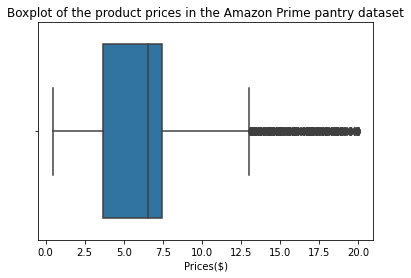

In [103]:
prices_center = df_clean.loc[(df_clean['price_num']>0) & (df_clean['price_num']<20),'price_num']
ax =sns.boxplot(prices_center)
ax.set(xlabel='Prices($)', title='Boxplot of the product prices in the Amazon Prime pantry dataset')
plt.show()

This time, we can tell better by the new boxplot that the median of prices for products in the Amazon Prime Pantry dataset is around \$5, and the majority of products have a price tag between \$2.5 - \$8. We can also plot the histgram of the price values, from which we can tell the data is **unimodal** and **skewed right**.

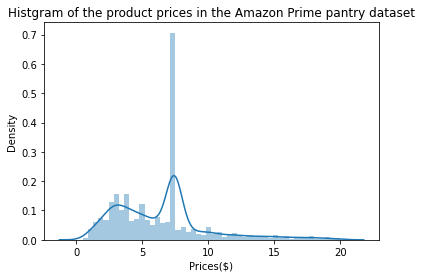

In [104]:
ax = sns.distplot(prices_center)
ax.set(xlabel='Prices($)', title='Histgram of the product prices in the Amazon Prime pantry dataset')
plt.show()

## Explore by brand and rating

We can also explore the relationship between brand and rating. We can group the dataframe by brand, and then compute the average rating and the sum of rating counts for each brand. Then we will sort the result by `rating_cnt` and `rating`.

From the result, we can see the top 10 brands that received most rating and their average rating on all products. Amoing them are mostly familiar big companies like Quaker, Crest, Tide, Method, and Neutrogena. It seems that these brands are very popular on the Amazon Prime pantry market and they all receive a relatively good rating over 4 (except Tom's of Maine but it's pretty close). It fits the market rule of people tending to buy goods that has a good review because it indicates good quality.

In [105]:
df_price_rating = df_clean[['brand','rating', 'rating_cnt']].groupby('brand').agg({'rating':'mean', 'rating_cnt':'sum'})
df_price_rating = df_price_rating.sort_values(by=['rating_cnt', 'rating'], ascending=False)
df_price_rating.head(10)

,rating,rating_cnt
brand,,
Planters,4.456244,9319
Quaker,4.347637,7942
Twinings,4.398009,7607
Crest,4.216607,7329
Brooklyn Beans,4.013691,5867
Method,4.358377,5647
Arm & Hammer,4.326857,4480
Tide,4.522328,4111
Tom's of Maine,4.011557,3906


# Data Modeling and Inferences

In [106]:
df_clean.head()

,description,title,also_buy,brand,feature,rank,also_view,details,main_cat,price,asin,imageURL,imageURLHighRes,feature_clean,rank_num,rank_cat,price_num,rating,rating_cnt
0,[Sink your sweet tooth into MILK DUDS Candya d...,"HERSHEY'S Milk Duds Candy, 5 Ounce(Halloween C...","[B019KE37WO, B007NQSWEU]",Milk Duds,[],[],[],"{'ASIN: ': 'B00005BPJO', 'Item model number:':...","<img src=""https://m.media-amazon.com/images/G/...",$5.00,B00005BPJO,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,[],0,,5.000000,3.300000,10
1,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",Saran,[],[],"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",{'Domestic Shipping: ': 'This item can only be...,"<img src=""https://images-na.ssl-images-amazon....",,B0000DIWNI,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,[],0,,7.421893,4.062500,64
2,[200 sq ft (285 ft x 11-3/4 in x 18.6 m2). Eas...,"Saran Cling Plus Plastic Wrap, 200 Sq Ft",[],Saran,[],[],[B0014CZ0TE],{'Domestic Shipping: ': 'This item can only be...,"<img src=""https://images-na.ssl-images-amazon....",,B0000DIWNZ,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,[],0,,7.421893,4.000000,20
3,"[Ibarra Chocolate, 19 Oz, , ]","Ibarra Mexican Chocolate, 19 oz",[B008MHKWLK],Ibarra,[],"259,768 in Grocery &amp; Gourmet Food (",[],"{'ASIN: ': 'B0000GH6UG', 'Item model number:':...","<img src=""https://images-na.ssl-images-amazon....",,B0000GH6UG,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,[],259768,Grocery & Gourmet Food,7.421893,3.959184,49
4,[Knorr Granulated Chicken Flavor Bouillon is a...,"Knorr Granulated Bouillon, Chicken 15.9 oz",[],Knorr,[],"372,929 in Grocery & Gourmet Food (",[],"{'ASIN: ': 'B0000KC2BK', 'Item model number:':...","<img src=""https://images-na.ssl-images-amazon....",$3.09,B0000KC2BK,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,[],372929,Grocery & Gourmet Food,3.090000,5.000000,7


In [107]:
sum([len(x) > 0 for x in df_clean['rank']])/len(df_clean)

0.4803633107330178

In [108]:
sum([len(x) > 0 for x in df_clean['feature_clean']])/len(df_clean)

0.12306511449405143

In [112]:
sum(df_clean['rank_num'] == 0)/len(df_clean)

0.5196366892669823

In [110]:
df_model = df_clean.copy()
df_model['des_len'] = df_model['description'].str.len()
df_model['title_len'] = df_model['title'].str.len()
df_model['buy'] = df_model['also_buy'].str.len()
df_model['view'] = df_model['also_view'].str.len()
df_model['feature_len'] = df_model['feature_clean'].str.len()
df_model['has_image'] = df_model['imageURL'].apply(lambda x: 1 if (len(x) > 0) else 0 )
df_model = df_model.loc[(df_model['price_num']>0)&(df_model['rank_num']>0),['des_len', 'title_len', 'buy', 'view', 'feature_len', 'has_image', 'rank_num', 'price_num', 'rating']]
df_model.head()


,des_len,title_len,buy,view,feature_len,has_image,rank_num,price_num,rating
3,3,31,1,0,0,1,259768,7.421893,3.959184
4,1,42,0,0,0,1,372929,3.090000,5.000000
5,1,37,0,0,0,1,382593,7.421893,4.684211
7,1,37,0,0,0,1,220130,7.421893,4.821429
9,31,31,0,52,6,1,1243,2.440000,4.439189


In [ ]:
df_model = df_model.reset_index(drop=True)
X = df_model[['des_len', 'title_len', 'buy', 'view', 'feature_len', 'has_image', 'rank_num', 'price_num']]
Y = df_model['rating']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_holdout, Y_train, Y_holdout = train_test_split(X, Y, test_size=0.1, random_state=45)

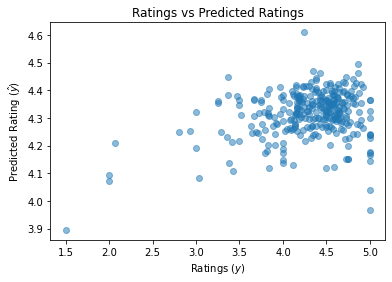

In [ ]:
import sklearn.linear_model as lm

linear_model = lm.LinearRegression()

# Fit your linear model
linear_model.fit(X_train, Y_train)

# Predict housing prices on the test set
Y_pred = linear_model.predict(X_holdout)

# Plot predicted vs true prices
plt.scatter(Y_holdout, Y_pred, alpha=0.5)
plt.xlabel("Ratings $(y)$")
plt.ylabel("Predicted Rating $(\hat{y})$")
plt.title("Ratings vs Predicted Ratings");

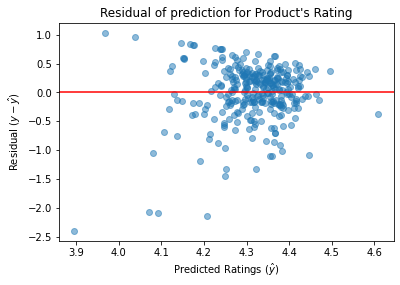

In [ ]:
plt.scatter(Y_pred, Y_holdout - Y_pred, alpha=0.5)
plt.ylabel("Residual $(y - \hat{y})$")
plt.xlabel("Predicted Ratings $(\hat{y})$")
plt.title("Residuals vs Predicted Ratings")
plt.title("Residual of prediction for Product's Rating")
plt.axhline(y = 0, color='r');

In [ ]:
def rmse(actual_y, predicted_y):
    """
    Args:
        predicted_y: an array of the prediction from the model
        actual_y: an array of the groudtruth label
        
    Returns:
        The root mean square error between the prediction and the groudtruth
    """
    return np.sqrt(np.mean((predicted_y-actual_y)**2))

train_error = rmse(Y_train, linear_model.predict(X_train))
holdout_error = rmse(Y_holdout, Y_pred)

print("Training RMSE:", train_error)
print("Holdout RMSE:", holdout_error)

Training RMSE: 0.48511321181965544
Holdout RMSE: 0.48771643964890915


In [ ]:
from sklearn.metrics import r2_score

r2_train_1 = r2_score(Y_train, linear_model.predict(X_train))
r2_holdout_1 = r2_score(Y_holdout, linear_model.predict(X_holdout))
r2_train_1, r2_holdout_1

(0.02690043687171284, 0.06859459700963177)

In [ ]:
from sklearn.linear_model import Ridge

regularized_model = Ridge(alpha = 10**2)
regularized_model.fit(X_train, Y_train)
regularized_model.coef_

array([ 4.35380535e-03, -1.80945463e-03,  6.12570463e-04,  3.26177845e-04,
        3.46074462e-03,  4.43423638e-02, -3.52933251e-07, -1.48915371e-03])

In [ ]:
linear_model.coef_

array([ 4.27091749e-03, -1.82069077e-03,  6.13839697e-04,  3.19825295e-04,
        3.33781637e-03,  6.20348556e-02, -3.44422924e-07, -1.49980146e-03])

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X)
X_scaled = pd.DataFrame(ss.transform(X), columns = X.columns)
X_scaled.head()

,des_len,title_len,buy,view,feature_len,has_image,rank_num,price_num
0,-0.553564,-0.928085,-0.557417,-1.245790,-0.296764,0.343277,2.232484,-0.507282
1,-0.553564,-0.773723,0.553842,-0.617349,-0.296764,0.343277,0.778962,-0.395926
2,-0.553564,0.113856,-0.557417,-1.245790,-0.296764,-2.913100,7.500328,-0.729994
3,5.214049,-1.352580,-0.557417,1.477455,2.407444,0.343277,-0.803264,-0.610684
4,-0.553564,-1.198218,-0.557417,0.220573,-0.296764,0.343277,-0.803076,-0.809534


In [ ]:
np.random.seed(25)
X_train2, X_holdout2, Y_train2, Y_holdout2 = train_test_split(X_scaled, Y, test_size = 0.10)

In [ ]:
regularized_model = Ridge(alpha = 10**2)
regularized_model.fit(X_train2, Y_train2)
regularized_model.coef_

array([ 0.02428529, -0.04529468,  0.01803751, -0.0026532 ,  0.0105002 ,
        0.02616455, -0.0596182 , -0.01135203])

In [ ]:
error_vs_alpha = pd.DataFrame(columns = ["alpha", "Training Error", "Holdout Error"])
range_of_alphas = 10**np.linspace(1, 8, 40)

for alpha in range_of_alphas:
    
    current_model = Ridge(alpha = alpha)
    current_model.fit(X_train2, Y_train2)
    train_error_c = rmse(Y_train2, current_model.predict(X_train2))
    holdout_error_c = rmse(Y_holdout2, current_model.predict(X_holdout2))
    error_vs_alpha.loc[len(error_vs_alpha)] = [alpha, train_error_c, holdout_error_c]

error_vs_alpha

,alpha,Training Error,Holdout Error
0,1.000000e+01,0.484516,0.494481
1,1.511775e+01,0.484516,0.494443
2,2.285464e+01,0.484517,0.494387
3,3.455107e+01,0.484518,0.494303
4,5.223345e+01,0.484520,0.494181
5,7.896523e+01,0.484524,0.494004
6,1.193777e+02,0.484534,0.493753
7,1.804722e+02,0.484554,0.493407
8,2.728333e+02,0.484595,0.492948
9,4.124626e+02,0.484672,0.492368


In [ ]:
import plotly.express as px

px.line(error_vs_alpha, x = "alpha", y = ["Training Error", "Holdout Error"], log_x=True)

The best alpha is 17k.

In [ ]:
best_regularized_model = Ridge(alpha = 17000)
best_regularized_model.fit(X_train2, Y_train2)
best_regularized_model.coef_

array([ 0.00477914, -0.00624307,  0.00250044,  0.004786  ,  0.00275578,
        0.00528881, -0.00880528, -0.00362108])

In [ ]:
best_train_error = rmse(Y_train2, best_regularized_model.predict(X_train2))
best_holdout_error = rmse(Y_holdout2, best_regularized_model.predict(X_holdout2))
best_train_error, best_holdout_error

(0.4907149706983281, 0.4875593800982829)

In [ ]:
from sklearn.metrics import r2_score

r2_train = r2_score(Y_train2, best_regularized_model.predict(X_train2))
r2_holdout = r2_score(Y_holdout2, best_regularized_model.predict(X_holdout2))
r2_train, r2_holdout

(0.012326264348082705, -0.004983365155391883)